In [ ]:
import numpy as np
import matplotlib as plt
import pandas as pd
from numpy.random import RandomState
import matplotlib.pyplot as plt

In [ ]:
# Structure of the Network, You can set n, k, and m based on dataset
n_neuron = 2
m_partner = 1
layers_num_neuron = [n , k , m] 
# number of iteration
iter = 500
# Learning rate
Learning_rate = 0.01
All_error = 0

In [ ]:
def guassian(dk, sk):
  # Compute the Gaussian Function
  return np.exp(( -1*(dk)**2) / (2*(sk)**2) )


In [ ]:
def Euclidian(X , C):
  # Compute the Euclidian distance
  dk = np.linalg.norm(X - C)
  return dk
   


In [ ]:
def Feedforward(X, c, s, Weights):
  # In this function, we compute the output of RBF layer by using guassian function 
  # and the distance between X and Ck multipy by weights
  # This is the output of the network. 
  # Using single step learning, by every output for every trainig pattern, we 
  # call GD function to update the weights between RBF and output layers.
  global m, k
  output = np.zeros(m)
  net = np.zeros(k)
  fnet = np.zeros(k)
  
  for i in range(len(X)):
    for j in range(len(c)):
      net[j] = Euclidian(X[i], c[j])
      # fnet is rk for each RBF neuron
      fnet[j] = guassian(net[j], s[j])
    output = np.dot(Weights, fnet)
    Weights = GD(Y, i, output, Weights, fnet)
  
  return Weights

  
    
  



In [ ]:
def GD(Y, i, output, weights, fnet):
  global Learning_rate , All_error 
  # In this function, the weights are trained using delta-rule
  # error = target - output
  error =np.array(Y[i] - output)
  All_error = np.linalg.norm(error) + All_error 
  if m > 1:
    error = np.reshape(error, (m, 1))
  # Delta_w = Learning_rate * (target - output) * rk
  delta_w = Learning_rate * error * fnet
  weights = weights + delta_w
  return weights


In [ ]:
# Reading File 3
df = pd.read_csv("PA-B_training_data_03.txt", sep=" ", header=None,skiprows=2)
df1 = df.dropna(axis=1)
df1.head()
# Splitting dataset into training and testing
mask = np.random.rand(len(df1)) <= 0.8
training_data = df1[mask]
testing_data = df1[~mask]

X = training_data.iloc[:,:n].values
Y = training_data.iloc[:,n:(n+m)].values

X_test =  testing_data.iloc[:,:n].values
Y_test = testing_data.iloc[:,n:(n+m)].values


In [ ]:
# Reading File 4

values = open('PA-B_training_data_04.txt').read().split()
m = 1 #number of neurons in the last layer
n = 2 #layers_number
X, Y = [], []

for i in range(6, len(values), 3):
  X.append([values[i], values[i+1]])
  Y.append(values[i+2])


X = np.array(X).astype(np.float)
Y = np.array(Y).astype(np.float)

df_X = pd.DataFrame(X)
df_Y = pd.DataFrame(Y)
frames = [df_X, df_Y]
df1 = pd.concat(frames , axis=1)
df1.head()
# Splitting dataset into training and testing
mask = np.random.rand(len(df1)) <= 0.8
training_data = df1[mask]
testing_data = df1[~mask]

X = training_data.iloc[:,:n].values
Y = training_data.iloc[:,n:(n+m)].values

X_test =  testing_data.iloc[:,:n].values
Y_test = testing_data.iloc[:,n:(n+m)].values


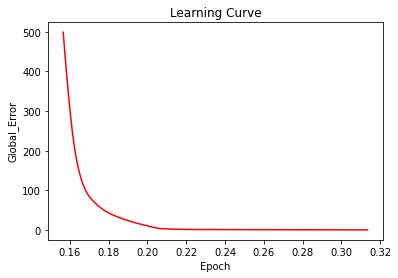

In [ ]:
# Initialize the network
# Randomly select k Ck from dataset(X)
indices = np.random.choice(X.shape[0], k , replace=False)
c = X[indices]
#print(c)
# Randomly set Sk
s = np.random.uniform(low = 1 , high = 2, size=k)

# Generate initial weights with the same seed 
prng = RandomState(1)
Weights = prng.uniform(low = -0.5 , high = 0.5, size=(m, k) )
e=[] 
# Trainig the network w.r.t iteration and training dataset
for j in range(iter):
  All_error = 0
  Weights = Feedforward(X, c, s, Weights)
  All_error = All_error/len(X)
  e.append(All_error)
  # Writing Global Error on learning curve.txt
  if j == 0:
    f = open("learning curve.txt", "w")
    string = '#Eppoch' + '\t' + '#Global_Error' + '\n'
    f.write(string)
  else:
    f = open("learning curve.txt", "a")
  string = str(j)+ '\t' + str(All_error) + '\n'
  f.write(string)
  f.close()
  
plt.plot(e, np.arange(iter), 'r')
plt.xlabel("Epoch")
plt.ylabel("Global_Error")
plt.title("Learning Curve")
plt.show()


In [ ]:
# Testing the network w.r.t testing dataset
output = np.zeros(m)
net = np.zeros(k)
fnet = np.zeros(k)
counter = 0
for i in range(len(X_test)):
  for j in range(len(c)):
    net[j] = Euclidian(X_test[i], c[j])
    # fnet is rk for each RBF neuron
    fnet[j] = guassian(net[j], s[j])
  output = np.dot(Weights, fnet)
  if np.abs(np.sum(output-Y_test[i])/m)<0.5: counter += 1
print((counter/len(X_test))*100)

100.0
